In [1]:
from IPython.display import Image

import requests
r = requests.get(url="http://api.open-notify.org/astros.json")
r.json()

{'number': 10,
 'people': [{'name': 'Oleg Artemyev', 'craft': 'ISS'},
  {'name': 'Denis Matveev', 'craft': 'ISS'},
  {'name': 'Sergey Korsakov', 'craft': 'ISS'},
  {'name': 'Kjell Lindgren', 'craft': 'ISS'},
  {'name': 'Bob Hines', 'craft': 'ISS'},
  {'name': 'Samantha Cristoforetti', 'craft': 'ISS'},
  {'name': 'Jessica Watkins', 'craft': 'ISS'},
  {'name': 'Cai Xuzhe', 'craft': 'Tiangong'},
  {'name': 'Chen Dong', 'craft': 'Tiangong'},
  {'name': 'Liu Yang', 'craft': 'Tiangong'}],
 'message': 'success'}

In [2]:
import pandas as pd
import numpy as np

def iss_visual(long, lat, max_x_px, max_y_px):
    scale_x = (((long + 180) / 360) * max_x_px)
    scale_y = (((lat - 90) / 180) * max_y_px)
    
    return scale_x, scale_y

iss_visual(20,90,500,250)

(277.77777777777777, 0.0)

In [3]:
def iss_loc():
    r = requests.get(url="http://api.open-notify.org/iss-now.json")
    iss_loc = (r.json())
    
    iss_long = float(iss_loc["iss_position"]["longitude"])
    print("iss_longitude", iss_long)

    iss_lat = float(iss_loc["iss_position"]["latitude"])
    print("iss_latitude", iss_lat)
    
    return (iss_long, iss_lat)

In [4]:
pip install Basemap

Note: you may need to restart the kernel to use updated packages.


In [5]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
iss_loc()

iss_longitude -73.4341
iss_latitude 46.5613


(-73.4341, 46.5613)

iss_longitude -73.0281
iss_latitude 46.6999


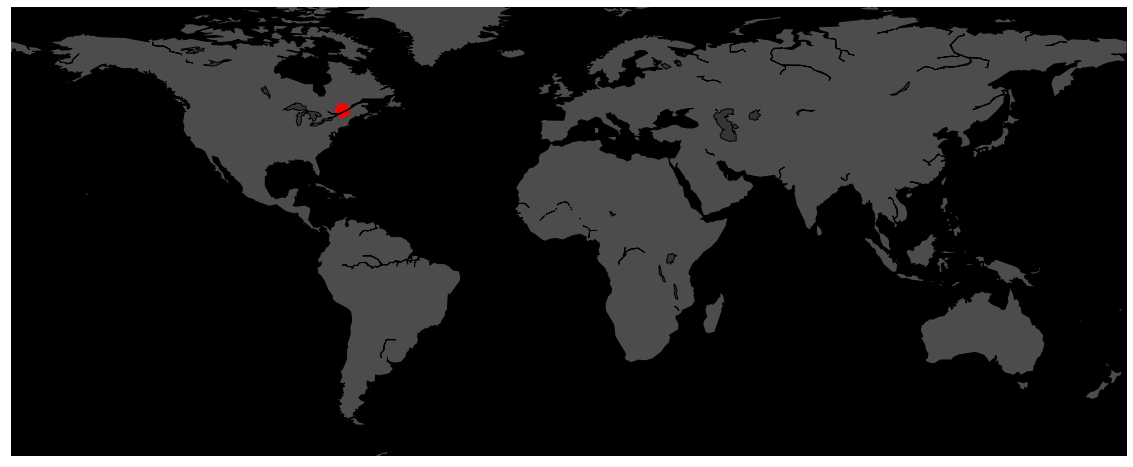

In [7]:
plt.figure(figsize = (20,14))

m = Basemap(llcrnrlon=-180, llcrnrlat=-65, urcrnrlon=180, urcrnrlat=80)
m.drawmapboundary(fill_color="Black", linewidth=0)
m.fillcontinents(color="White", alpha=0.3)
m.drawcoastlines(linewidth=1, color="Black")

iss_long, iss_lat = iss_loc()
m.scatter(iss_long, iss_lat, s=200, alpha=0.9, color="Red")

In [8]:
record_data = True
if record_data == True:
    import datetime
    date_to_print = datetime.datetime.now().strftime("%Y%m%d%H%M%S")

    import time
    starttime=time.time()


    space_station_data = []
    while True: 
        r = requests.get(url='http://api.open-notify.org/iss-now.json')
        space_station_location = (r.json())
        print(space_station_location)

        space_station_data.append([space_station_location['timestamp'],
                                space_station_location['iss_position']['latitude'],
                                space_station_location['iss_position']['longitude']
                                ])

        # dump copy to file
        tmp_space_station_data_df = pd.DataFrame(space_station_data, columns=['timestamp','latitude', 'longitude',])
        tmp_space_station_data_df.to_csv('ISS_location_' + date_to_print + '.csv', index=None)
        
        # safety break
        if len(space_station_data) ==100:
            break
            
        # retrieve coordinates every 10 seconds
        time.sleep(10.0 - ((time.time() - starttime) % 10.0))

{'iss_position': {'latitude': '46.7822', 'longitude': '-72.7835'}, 'timestamp': 1657936756, 'message': 'success'}
{'iss_position': {'latitude': '47.0525', 'longitude': '-71.9626'}, 'timestamp': 1657936766, 'message': 'success'}
{'iss_position': {'latitude': '47.3163', 'longitude': '-71.1329'}, 'timestamp': 1657936776, 'message': 'success'}
{'iss_position': {'latitude': '47.5734', 'longitude': '-70.2946'}, 'timestamp': 1657936786, 'message': 'success'}
{'iss_position': {'latitude': '47.8237', 'longitude': '-69.4477'}, 'timestamp': 1657936796, 'message': 'success'}
{'iss_position': {'latitude': '48.0672', 'longitude': '-68.5919'}, 'timestamp': 1657936806, 'message': 'success'}
{'iss_position': {'latitude': '48.3035', 'longitude': '-67.7280'}, 'timestamp': 1657936816, 'message': 'success'}
{'iss_position': {'latitude': '48.5327', 'longitude': '-66.8558'}, 'timestamp': 1657936826, 'message': 'success'}
{'iss_position': {'latitude': '48.7545', 'longitude': '-65.9754'}, 'timestamp': 16579368

In [10]:
iss_flight_record = pd.read_csv("ISS_location_20220716095914.csv")

from datetime import datetime
date_time = [datetime.fromtimestamp(dt) for dt in iss_flight_record["timestamp"]]
iss_flight_record["date"] = date_time
             
iss_flight_record["index"] = range(1, len(iss_flight_record)+1)

iss_flight_record.head()

,timestamp,latitude,longitude,date,index
0,1657936756,46.7822,-72.7835,2022-07-16 09:59:16,1
1,1657936766,47.0525,-71.9626,2022-07-16 09:59:26,2
2,1657936776,47.3163,-71.1329,2022-07-16 09:59:36,3
3,1657936786,47.5734,-70.2946,2022-07-16 09:59:46,4
4,1657936796,47.8237,-69.4477,2022-07-16 09:59:56,5


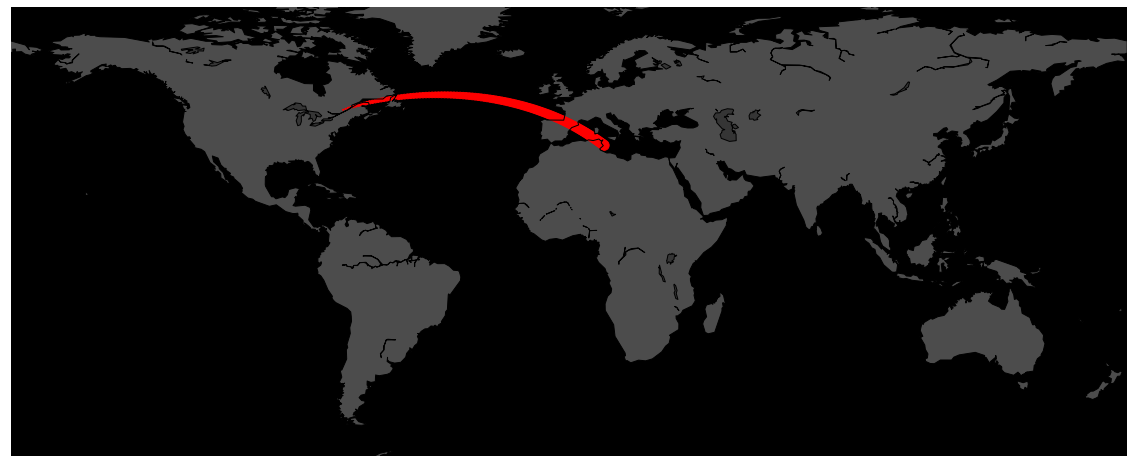

In [12]:
from mpl_toolkits.basemap import Basemap
plt.figure(figsize = (20, 14))

m = Basemap(llcrnrlon=-180, llcrnrlat=-65, urcrnrlon=180, urcrnrlat=80)
m.drawmapboundary(fill_color="black", linewidth=0)
m.fillcontinents(color="white", alpha=0.3)
m.drawcoastlines(linewidth=1, color="black")

m.scatter(iss_flight_record["longitude"],
          iss_flight_record["latitude"],
          s=iss_flight_record["index"], alpha=1.0, color="Red")